In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [5]:
gdp_df.shape

(7662, 4)

In [6]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [7]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [8]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

year is ordinal categorical

In [10]:
gdp_df['Year'] = gdp_df['Year'].astype(str)

#7
232 obs for 2022

In [12]:
gdp_df['Country'].value_counts(ascending = True)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
                             ..
Jamaica                      33
Japan                        33
Jordan                       33
IDA total                    33
Zimbabwe                     33
Name: count, Length: 242, dtype: int64

In [13]:
gdp_df['Country'].min

<bound method Series.min of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
7657       Zimbabwe
7658       Zimbabwe
7659       Zimbabwe
7660       Zimbabwe
7661       Zimbabwe
Name: Country, Length: 7662, dtype: object>

In [14]:
gdp_df['Country'].max

<bound method Series.max of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
7657       Zimbabwe
7658       Zimbabwe
7659       Zimbabwe
7660       Zimbabwe
7661       Zimbabwe
Name: Country, Length: 7662, dtype: object>

In [15]:
gdp_2021 = gdp_df[gdp_df['Year'] == '2021'].reset_index(drop=True)

In [16]:
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Africa Eastern and Southern,2021,3519.174840
2,Africa Western and Central,2021,4014.607965
3,Albania,2021,14595.944386
4,Algeria,2021,11029.138782
...,...,...,...
236,Viet Nam,2021,10628.219166
237,West Bank and Gaza,2021,5641.044400
238,World,2021,17055.357429
239,Zambia,2021,3236.788981


In [17]:
gdp_2021.describe()

,GDP_Per_Capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


Question 11: Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

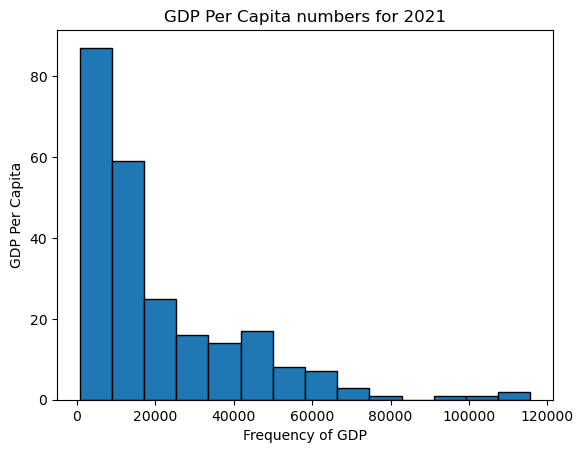

In [19]:
plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
        edgecolor='black',
    linewidth=1,
    bins="auto"
)
plt.xlabel('Frequency of GDP')                            
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita numbers for 2021');

Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [21]:
gdp_2021.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
130,Luxembourg,2021,115683.493708
192,Singapore,2021,107741.118436
102,Ireland,2021,102785.490239
180,Qatar,2021,92862.571798
21,Bermuda,2021,78570.489515


In [22]:
gdp_2021.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
30,Burundi,2021,714.066712
38,Central African Republic,2021,837.504686
51,Dem. Rep. Congo,2021,1073.643271
198,Somalia,2021,1136.735989
159,Niger,2021,1186.576809


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [24]:
gdp_df['Year'] = gdp_df['Year'].astype(int)
gdp_pivoted= gdp_df[gdp_df['Year'].isin([1990, 2021])]

In [25]:
gdp_pivoted.pivot_table(values='GDP_Per_Capita', index= 'Country', columns= 'Year').dropna()

Year,1990,2021
Country,,
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
Angola,5793.084512,5911.835657
...,...,...
Vanuatu,2774.138350,2800.493866
Viet Nam,2099.394649,10628.219166
World,9705.981267,17055.357429


In [26]:
gdp_pivoted.isna().value_counts()

Country  Year   GDP_Per_Capita
False    False  False             448
Name: count, dtype: int64


Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

Determine the number of countries per continent. Create a bar chart showing this.

Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

What was the first country with a life expectancy to exceed 80?

Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

Bonus: Solo Exploration:
Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find.
If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.